In [505]:
import torch 
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import TensorDataset

In [506]:
class dataset(Dataset):
    def __init__(self):
        data = pd.read_excel('X_Y.xlsx')  
        self.X = torch.FloatTensor(np.array( data.iloc[:,1:-1]))
        self.y = torch.FloatTensor(np.array(data.iloc[:,-1]))
        self.len = len(self.X)
        
    def __getitem__(self,index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.len

In [507]:
in_dim = 17
n_hidden_1 = 3
n_hidden_2 = 3
out_dim = 1

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
                                    nn.Linear(in_dim, n_hidden_1), 
                                    # nn.BatchNorm1d(n_hidden_1), 
                                    nn.ReLU(True),
                                    nn.Sigmoid()
                                    )
        self.layer2 = nn.Sequential(
                                    nn.Linear(n_hidden_1, n_hidden_2), 
                                    # nn.BatchNorm1d(n_hidden_2), 
                                    nn.ReLU(True)
                                    )
        self.layer3 = nn.Sequential(
                                    nn.Linear(n_hidden_2, out_dim),
                                    nn.Sigmoid()
                                    )
    def forward(self, x):
        y_pred = self.layer1(x)
        y_pred = self.layer2(y_pred)
        y_pred = self.layer3(y_pred)
        return y_pred

In [508]:
data = dataset()
# 随机分成训练集和测试集，训练集占70%
rate = 0.7
bz = 8
train_set, test_set = random_split(data, [int(data.len*rate), data.len-int(data.len*rate)])

# 加载训练集
train_loader = DataLoader(dataset=train_set,
                          batch_size=bz,
                          shuffle=True,)
# 加载测试集
test_loader = DataLoader(dataset=test_set,
                          batch_size=bz,
                          shuffle=True,)

In [535]:
model = Model()
# 使用BCE(Binary Cross Entropy)二元交叉熵损失函数
criterion = nn.BCELoss()
# 使用Adam优化算法
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# 用于存放loss
loss_list = []

# 对整个样本训练10次
for epoch in range(10):
    # 每次训练一个minibatch
    for i, (X, y) in enumerate(train_loader):
        # 进行预测，也就是做了一次前向传播
        y_pred = model(X)
        
        # print(y.shape)
        # 计算损失
        loss = criterion(y_pred, y.reshape(8,1))
        # 梯度归0
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 更新梯度
        optimizer.step()
        # 记录损失
        loss_list.append(loss.data.item())

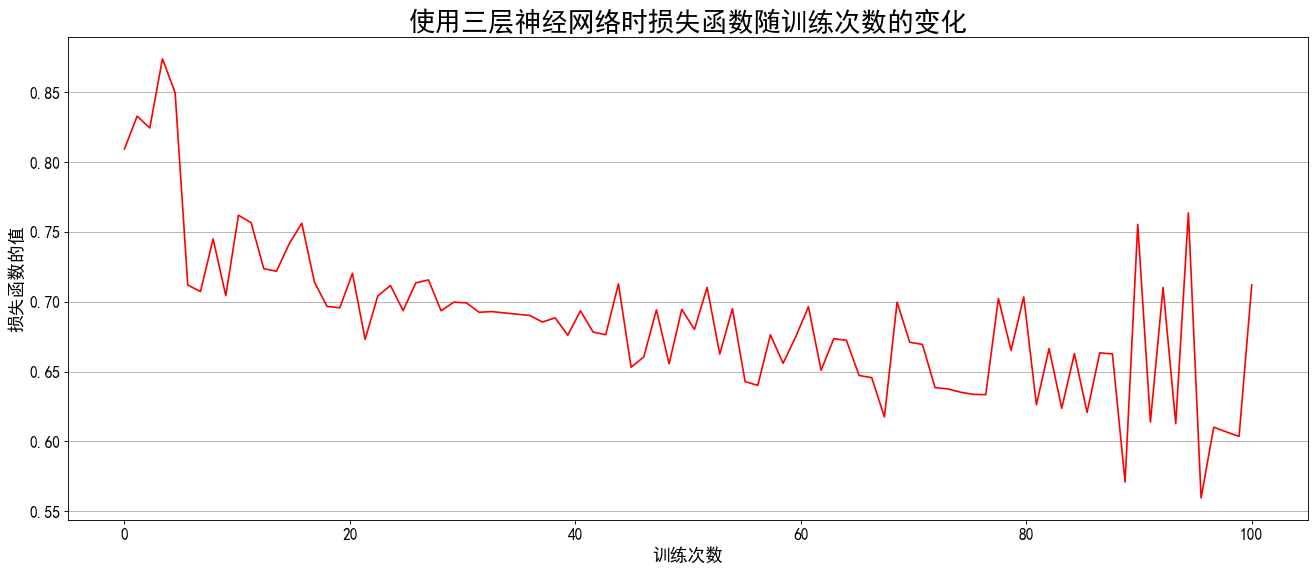

In [536]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 画出损失下降的图像
plt.figure(figsize=(20,8), dpi=80)
plt.plot(np.linspace(0,100,len(loss_list)), loss_list, color='red')
plt.xlabel("训练次数", fontsize=16)
plt.ylabel("损失函数的值", fontsize=16)
plt.title("使用三层神经网络时损失函数随训练次数的变化", fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.show()
# 查看当前的训练参数，也就是w和b
# print(model.state_dict())
## 保存模型
# torch.save({'model': model.state_dict()}, './model_name.pth')

In [537]:
# 使用测试集验证
model.eval()
cnt = 0
for batch,(X, y) in enumerate(test_loader):
    for (XX,yy) in zip(X,y):
        # 进行预测，也就是做了一次前向传播
        y_pred = model(XX[None,])
        # print(XX)
        y_pred = y_pred.data.item()

        if y_pred>=0.5:
            yy_pred = 1
        else:
            yy_pred = 0
        # print("第%d个batch\t"%batch,XX,'\t',yy,'\t',y_pred,'\t',yy_pred,end='')
        if yy_pred == yy:
            print('\t预测正确')
            cnt += 1
        else:
            print('\t预测错误')
print('准确率：{}'.format(cnt/(len(data)*(1-rate))))

	预测正确
	预测错误
	预测错误
	预测错误
	预测正确
	预测错误
	预测正确
	预测正确
	预测错误
	预测正确
	预测正确
	预测正确
	预测错误
	预测正确
	预测错误
	预测正确
	预测正确
	预测正确
	预测正确
	预测正确
	预测正确
	预测错误
	预测错误
	预测正确
	预测错误
	预测错误
	预测正确
	预测正确
	预测错误
	预测正确
	预测错误
	预测正确
准确率：0.6089743589743589


In [512]:
df = pd.read_excel('X_Y_test.xlsx')
# df

In [513]:
X = torch.FloatTensor(np.array(df.iloc[:,:-1]))
X

tensor([[ 0.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 71.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
          0.,  0., 74.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         13.,  0., 78.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 72.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
          0.,  0., 81.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
          0.,  0., 67.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0., 76.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,
          0.,  0., 68.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,
          0.,  0., 77.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 

In [514]:
Y = model(X)

In [515]:
for i in Y:
    print("%.5f"%i)

0.65202
0.65201
0.65211
0.65201
0.65201
0.65201
0.65201
0.65201
0.65201
0.65209
0.65202
0.65201
0.65202
0.65231
0.65201
